# 1. Classification examples
---

## 1.1. Using KNN (K nearest neighbors) classifier for iris dataset 

### Loading dataset

In [1]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data
y = iris.target

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
print(y[:5])

[0 0 0 0 0]


In [3]:
random_index = np.random.choice(np.arange(X.shape[0]), size = 5)
print([X[i] for i in random_index])
print([y[i] for i in random_index])
print([iris.target_names[y[i]] for i in random_index])

[array([6.7, 3.3, 5.7, 2.1]), array([4.8, 3.4, 1.9, 0.2]), array([6.4, 2.8, 5.6, 2.1]), array([6.9, 3.1, 4.9, 1.5]), array([5.2, 2.7, 3.9, 1.4])]
[2, 0, 2, 1, 1]
['virginica', 'setosa', 'virginica', 'versicolor', 'versicolor']


### Spliting dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1, stratify=y)

In [5]:
values, counts = np.unique(y,return_counts=True)
print(values)
print(counts)

[0 1 2]
[50 50 50]


In [6]:
values, counts = np.unique(y_test,return_counts=True)
print(values)
print(counts)

[0 1 2]
[20 20 20]


### Preprocessing data
Comment for the first run

In [7]:
from sklearn.preprocessing import StandardScaler
#Standardize features by removing the mean and scaling to unit variance
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Training model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluating and predicting

In [9]:
from sklearn import metrics
y_pred = classifier_knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [10]:

print(metrics.confusion_matrix(y_test, y_pred))

[[20  0  0]
 [ 0 20  0]
 [ 0  2 18]]


In [11]:
y_prob = classifier_knn.predict_proba(X_test)

In [12]:
y_pred[:5]

array([0, 2, 0, 1, 2])

In [13]:
print('Train score:', classifier_knn.score(X_train, y_train))
print('Test score:', classifier_knn.score(X_test, y_test))

Train score: 0.9222222222222223
Test score: 0.9666666666666667


In [14]:
sample = [[5, 5, 3, 2], [2, 4, 3, 5]]
preds = classifier_knn.predict(sample)
pred_species = [iris.target_names[p] for p in preds]
print("Predictions:", pred_species)

Predictions: ['virginica', 'virginica']


### Doing grid search

In [15]:
from sklearn.model_selection import GridSearchCV
# grid_params = {'n_neighbors': [3, 5, 11, 19]}
grid_params = {'n_neighbors': [3, 5, 11, 19],\
               'weights':['uniform', 'distance'],\
               'metric': ['euclidean', 'manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1) 
#Controls the verbosity: the higher, the more messages.
gs_results = gs.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [16]:
gs.cv_results_

{'mean_fit_time': array([0.00066559, 0.00033363, 0.00066686, 0.00066837, 0.00100295,
        0.00066654, 0.        , 0.00066678, 0.00100096, 0.00066717,
        0.00066646, 0.00066654, 0.00066725, 0.00033379, 0.00066654,
        0.00033379]),
 'std_fit_time': array([4.70639818e-04, 4.71819920e-04, 4.71539192e-04, 9.45213323e-04,
        2.58500671e-06, 4.71314248e-04, 0.00000000e+00, 4.71482906e-04,
        2.97360213e-07, 4.71763815e-04, 4.71258324e-04, 4.71315374e-04,
        4.71819920e-04, 4.72044703e-04, 4.71314168e-04, 4.72044703e-04]),
 'mean_score_time': array([0.00266735, 0.00166567, 0.00199906, 0.00133133, 0.00199731,
        0.00100025, 0.00233316, 0.00133316, 0.00199978, 0.00100032,
        0.0023334 , 0.00100104, 0.00233261, 0.00133387, 0.00199946,
        0.00100017]),
 'std_score_time': array([4.71145731e-04, 4.71932352e-04, 8.16437433e-04, 4.67998970e-04,
        2.92218150e-06, 1.12391596e-07, 4.71707569e-04, 4.71090591e-04,
        1.74478677e-06, 1.12391596e-07, 4.71

In [17]:
gs_results.best_score_

0.9444444444444443

In [18]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

In [19]:
gs_results.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [20]:
gs_results.best_estimator_.score(X_train, y_train)

0.9333333333333333

In [21]:
gs_results.best_estimator_.score(X_test, y_test)

0.9833333333333333

In [22]:
# Thực hiện GridSearch để tìm ra bộ tham số phù hợp với bộ dữ liệu WINE
# YOU CODE HERE














## 1.2. Using SVM classifier for digit dataset 

### Loading dataset

In [23]:
from sklearn.datasets import load_wine
from sklearn import svm 
import numpy as np
wine = load_wine()
X = wine.data
y = wine.target

### Preprocessing data

In [24]:
# print(digits.images.shape)
# n_samples = len(digits.images)
# data = digits.images.reshape((n_samples, -1))
# print(data.shape)

### Spliting dataset

In [25]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1, stratify=y)
#This stratify parameter makes a split so that the proportion of values in the sample produced will be 
#the same as the proportion of values provided to parameter stratify.

### Training model

In [26]:
classifier = svm.SVC(kernel = 'rbf', C = 10, gamma = 1e-3)
#Radial basis function kernel (aka squared-exponential kernel).
#The RBF kernel is a stationary kernel. It is also known as the “squared exponential” kernel
classifier.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

### Evaluating and predicting

In [27]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

# _, axes = plt.subplots(2, 4)
# images_and_labels = list(zip(digits.images, digits.target))
# for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     ax.set_title('Training: %i' % label)

# images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
# for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     ax.set_title('Prediction: %i' % prediction)
# plt.show()

Classification report for classifier SVC(C=10, gamma=0.001):
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.70      0.72      0.71        29
           2       0.73      0.58      0.65        19

    accuracy                           0.75        72
   macro avg       0.75      0.74      0.74        72
weighted avg       0.75      0.75      0.75        72




C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[22  1  1]
 [ 5 21  3]
 [ 0  8 11]]


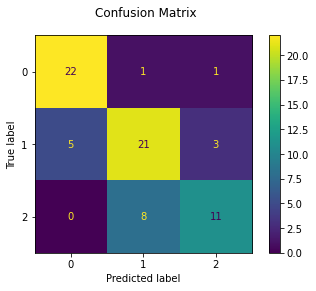

In [28]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [29]:
classifier.score(X_train, y_train)

0.9905660377358491

In [30]:
classifier.score(X_test, y_test)

0.75

### Doing grid search
There some parameters in SVM classifier: C, kernel.

In [31]:
from sklearn.model_selection import GridSearchCV
grid_params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1., 10., 100., 1000.]},\
               {'kernel': ['linear'], 'C': [1., 10., 100., 1000.]}]
# Complete code for grid search and display results
gs = GridSearchCV(svm.SVC(), grid_params, verbose = 1, cv = 5, n_jobs = -1, scoring = 'accuracy')
gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [32]:
print('Best param:', gs_results.best_params_)
print('Best score:', gs_results.best_score_)
print('Test score',gs_results.best_estimator_.score(X_test, y_test))
print('Train score',gs_results.best_estimator_.score(X_train, y_train))

# True output:

# Best param: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
# Best score: 0.9700765483646486
# Test score 0.9638888888888889

Best param: {'C': 1.0, 'kernel': 'linear'}
Best score: 0.9147186147186147
Test score 0.9305555555555556
Train score 0.9905660377358491


## 1.3. Doing grid search over multiple classifiers

In [33]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
class DummyEstimator(BaseEstimator):
    def fit(self): pass
    def score(self): pass

# Create a pipeline
pipe = Pipeline([('clf', DummyEstimator())]) # Placeholder Estimator

# Candidate learning algorithms and their hyperparameters
search_space = [{'clf': [KNeighborsClassifier()], # Actual Estimator
                 'clf__n_neighbors': [3,5,7,11]},

                {'clf': [svm.SVC()],  # Actual Estimator
                 'clf__kernel': ['rbf'],'clf__gamma':[1e-3, 1e-4],'clf__C':[1., 10., 100., 1000.]},
                
               {'clf': [svm.SVC()],  # Actual Estimator
                 'clf__kernel': ['linear'],'clf__C':[1., 10., 100., 1000.]}]

# Create grid search 
gs = GridSearchCV(pipe, search_space)

In [34]:
# Fit với dữ liệu iris:
gs_results = gs.fit(X_train, y_train)
gs_results.best_params_

{'clf': SVC(kernel='linear'), 'clf__C': 1.0, 'clf__kernel': 'linear'}

In [35]:
print('Best param:', gs_results.best_params_)
print('Best score:', gs_results.best_score_)
print('Test score',gs_results.best_estimator_.score(X_test, y_test))
print('Train score',gs_results.best_estimator_.score(X_train, y_train))

Best param: {'clf': SVC(kernel='linear'), 'clf__C': 1.0, 'clf__kernel': 'linear'}
Best score: 0.9432900432900432
Test score 0.9305555555555556
Train score 0.9905660377358491


In [36]:
# Fit với dữ liệu wine:
# YOU CODE HERE











## 1.4 Save and load model

In [37]:
import pickle
pickle.dump(gs_results.best_estimator_,open('best_model.pkl','wb'))

In [38]:
restore_clf = pickle.load(open('best_model.pkl','rb'))

In [39]:
restore_clf

Pipeline(steps=[('clf', SVC(kernel='linear'))])

In [40]:
y_pred = restore_clf.predict(X_test)

In [41]:
y_pred[0]

2

# 2. Regression examples
---

## 2.1. Linear Regression with diabete dataset

### Loading dataset

In [42]:
from sklearn import datasets
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape)

(442, 10)


In [43]:
# Use only one feature
diabetes_X = diabetes_X[:, 2:3]

In [44]:
print(diabetes_X.shape)

(442, 1)


### Spliting dataset

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, shuffle=False)

### Training model

In [46]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

### Evaluating and predicting

In [47]:
y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [957.76202681]


In [48]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 4079.82
Coefficient of determination: 0.36


In [49]:
regr.score(X_test, y_test)

0.36468857495916807

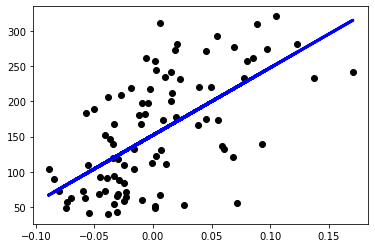

In [50]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

## 2.2. Poly Regression with diabete dataset

### Loading dataset

In [51]:
from sklearn import datasets
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X.shape)

(442, 10)


In [52]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

### Spliting dataset

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, shuffle=False)

### Training model

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree = 7
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

### Evaluating and predicting

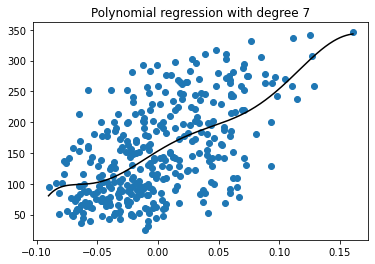

In [55]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_train,y_train)
X_seq = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = polyreg.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Mean squared error: 4123.16
Coefficient of determination: 0.36


## 2.3. KNN Regression with Boston dataset
Lặp lại các bước ở phần 2.2 với KNN Regression và dữ liệu Boston

In [57]:
from sklearn.neighbors import KNeighborsRegressor

### Loading dataset

In [58]:
from sklearn import datasets


In [59]:
# Use only one feature


### Spliting dataset

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, shuffle=False)

### Training model

In [61]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=5)
reg.fit(X_train,y_train)

KNeighborsRegressor()

### Evaluating and predicting

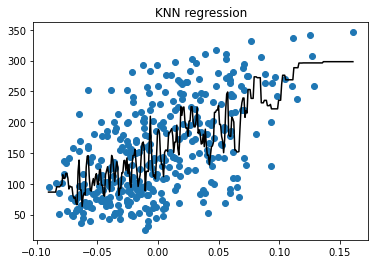

In [62]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_train,y_train)
X_seq = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
plt.plot(X_seq,reg.predict(X_seq),color="black")
plt.title("KNN regression")
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = polyreg.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Mean squared error: 4123.16
Coefficient of determination: 0.36


# 3. Clustering examples
---

### Loading dataset

In [78]:
from sklearn.datasets import make_blobs
#Generate isotropic Gaussian blobs for clustering.
X, _ = make_blobs(n_samples=200, centers=3, n_features=2,
                 cluster_std=0.7,  random_state=0)

In [ ]:
!pip uninstall numpy

In [ ]:
!pip install numpy==1.21.4 

### Training model

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

AttributeError: 'NoneType' object has no attribute 'split'

### Evaluating and predicting

In [ ]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
#Compute the mean Silhouette Coefficient of all samples.
print(silhouette_score(X, kmeans.labels_))

In [ ]:
#Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
kmeans.inertia_

## Advanced
Thực hiện phân cụm với các số lượng cụm lần lượt là 2, 3, 4, 5

Vẽ biểu độ Line Plot thể hiện mối quan hệ giữa số tâm cụm với kmeans.inertia_

In [ ]:
### You code here


